In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
x = df.drop('MEDV',axis=1)
y = df['MEDV']

In [ ]:
x = np.array(x)
y = np.array(y).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.3,random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit only on training data
x_train = scaler.fit_transform(x_train)

#Transform test data using same parameters
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.linear_model import LassoCV

#Try multiple alpha values
alphas  =np.logspace(-3, 3,7)

lasso_cv = LassoCV(alphas=alphas,cv=10)
lasso_cv.fit(x_train,y_train)

print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.001


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
best_ridge = Lasso(alpha=lasso_cv.alpha_)
best_ridge.fit(x_train,y_train)
y_pred = best_ridge.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#MSE
mse = mean_squared_error(y_test,y_pred)

#RMSE
rmse = np.sqrt(mse)

#R2 score
r2 = r2_score(y_test,y_pred)

print("MSE:",mse)
print("RMSE:",rmse)
print("r2 score:",r2)

MSE: 21.521510718492532
RMSE: 4.63912822828735
r2 score: 0.7111714316191495


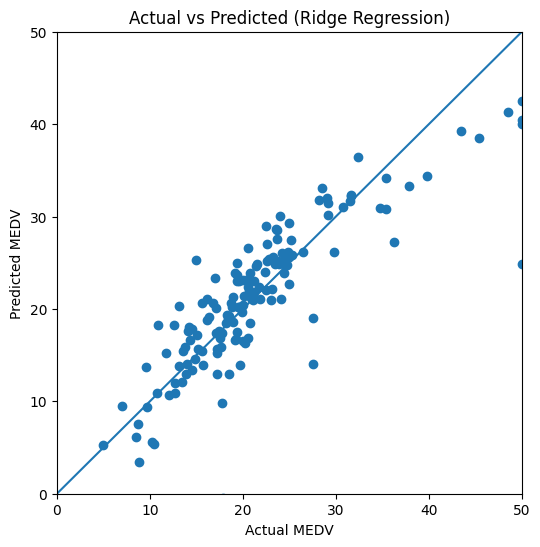

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

#plot prediction line
max_val = max(y_test.max(),y_pred.max())

plt.plot([0,max_val],[0,max_val], )

#start axes from 0
plt.xlim(0,max_val)
plt.ylim(0,max_val)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted (Ridge Regression)')

plt.show()

In [ ]:
display(x_train)

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [ ]:
display(y_train)

array([[28.7],
       [21.2],
       [19.3],
       [23.1],
       [19.1],
       [25. ],
       [33.4],
       [ 5. ],
       [29.6],
       [18.7],
       [21.7],
       [23.1],
       [22.8],
       [21. ],
       [48.8],
       [14.6],
       [16.6],
       [27.1],
       [20.1],
       [19.8],
       [21. ],
       [41.3],
       [23.2],
       [20.4],
       [18.5],
       [29.4],
       [36.4],
       [24.4],
       [11.8],
       [13.8],
       [12.3],
       [17.8],
       [33.1],
       [26.7],
       [13.4],
       [14.4],
       [50. ],
       [22. ],
       [19.9],
       [23.8],
       [17.5],
       [12.7],
       [ 5.6],
       [31.1],
       [26.2],
       [19.4],
       [16.7],
       [13.8],
       [22.9],
       [15.3],
       [27.5],
       [36.1],
       [22.9],
       [24.5],
       [25. ],
       [50. ],
       [34.9],
       [31.7],
       [24.1],
       [22.1],
       [14.1],
       [42.8],
       [19.3],
       [32.2],
       [26.4],
       [21.8],
       [21

In [ ]:
best_ridge = Lasso(alpha=lasso_cv.alpha_)
best_ridge.fit(x_train,y_train)
y_train_pred = best_ridge.predict(x_train)